<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/10week/RNN_LSTM_BeerWineLiquor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
# df = pd.read_csv('/content/drive/MyDrive/3-2/MLprogramming/10week/BeerWineLiquor.csv')
df = pd.read_csv('BeerWineLiquor.csv')
df

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [5]:
data = df['beer'].values.reshape(-1,1)

In [6]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [7]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:

model = tf.keras.Sequential([
    # tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    # tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mse', metrics=["mae"])
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0580 - mae: 0.1782
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mae: 0.0685
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mae: 0.0607
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mae: 0.0542
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mae: 0.0573
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mae: 0.0531
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mae: 0.0622
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mae: 0.0644
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mae: 0.0625
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mae: 0.0506
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mae: 0.0546
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mae: 0.0528
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


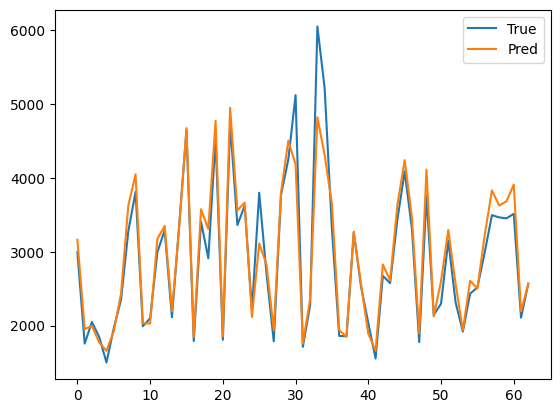

In [16]:
# 5. 예측
pred = model.predict(X_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

In [17]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test mse: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test mse: 0.0037
Test MAE: 0.0391


---

---

---

In [12]:
# 4. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=["mae"])
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0405 - mae: 0.1563
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mae: 0.0770
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mae: 0.0697
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mae: 0.0542
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mae: 0.0578
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mae: 0.0593
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mae: 0.0580
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mae: 0.0615
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mae: 0.0589
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mae: 0.0583
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mae: 0.0591
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mae: 0.0591
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


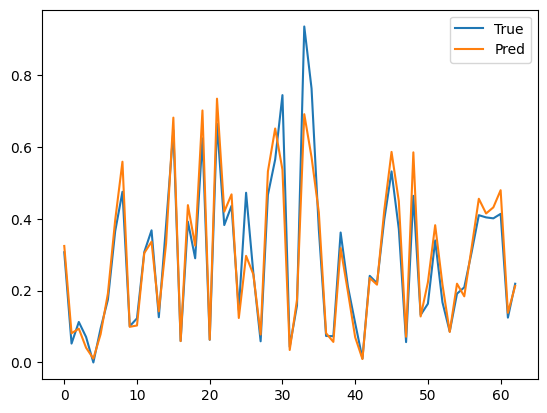

In [13]:
# 5. 예측
pred = model.predict(X_test)
# plt.plot(scaler.inverse_transform(y_test), label='True')
# plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.plot(y_test, label='True')
plt.plot(pred, label='Pred')
plt.legend(); plt.show()

In [14]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test mse: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test mse: 0.0042
Test MAE: 0.0415
